In [9]:
# 📌 Cell 1: Import Libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [10]:
# 📌 Cell 2: Load Titanic Dataset from seaborn
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
# 📌 Cell 3: Clean Dataset
# Drop unnecessary columns
df = df.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'], axis=1)

# Handle missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embarked'] = df['embarked'].astype(str)
df = df.dropna()


/tmp/ipython-input-11-2545286938.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-11-2545286938.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [12]:
# 📌 Cell 4: Feature Encoding
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])         # male:1, female:0
df['embarked'] = le.fit_transform(df['embarked'])  # S:2, C:0, Q:1

# Drop non-numeric or high-cardinality columns
df = df.drop(['sibsp', 'parch'], axis=1)

df.head()


,survived,pclass,sex,age,fare,embarked,alone
0,0,3,1,22.0,7.2500,2,False
1,1,1,0,38.0,71.2833,0,False
2,1,3,0,26.0,7.9250,2,True
3,1,1,0,35.0,53.1000,2,False
4,0,3,1,35.0,8.0500,2,True


In [13]:
# 📌 Cell 5: Feature Selection
X = df.drop("survived", axis=1)
y = df["survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
# 📌 Cell 6: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
# 📌 Cell 7: Model Evaluation
y_pred = model.predict(X_test)

print("🔎 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


🔎 Accuracy: 0.8100558659217877

🧮 Confusion Matrix:
 [[89 16]
 [18 56]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



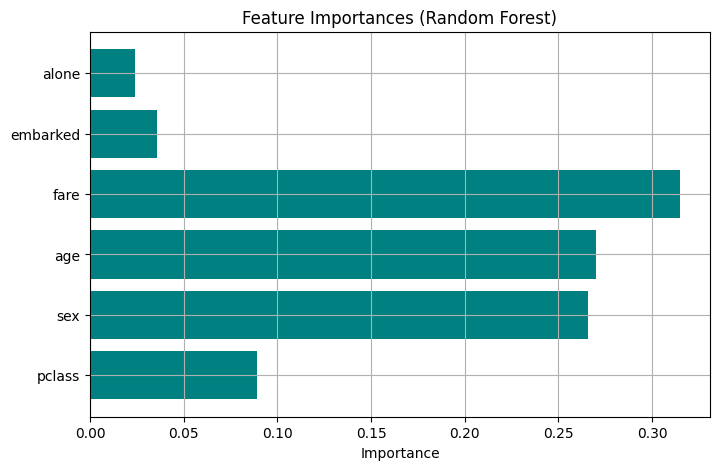

In [16]:
# 📌 Cell 8: Feature Importance
features = X.columns
importances = model.feature_importances_

plt.figure(figsize=(8, 5))
plt.barh(features, importances, color="teal")
plt.xlabel("Importance")
plt.title("Feature Importances (Random Forest)")
plt.grid(True)
plt.show()
